In [1]:
import pandas as pd


In [5]:
nba = pd.read_csv("../csv/season_stats.csv")

In [6]:
nba.head(5)

,Unnamed: 0,Date,Name,Season,TM,Opp,Score,Min,FGM,FGA,...,OR,DR,Reb,Ast,TO,Stl,Blk,PF,+/-,Pts
0,0,1/10/2023,Jimmy Butler,2022,MIA,OKC,W 111-112,37:57:00,6,17,...,2,5,7,4,2,4,3,1,5,35
1,1,1/10/2023,Luka Doncic,2022,DAL,LAC,L 101-113,42:48:00,12,22,...,0,11,11,7,3,2,0,2,-9,43
2,2,1/10/2023,Damion Lee,2022,PHO,GS,W 125-113,30:32:00,3,8,...,0,7,7,4,2,0,0,1,-3,22
3,3,1/10/2023,Kawhi Leonard,2022,LAC,DAL,W 101-113,35:55:00,9,12,...,1,8,9,4,2,4,1,0,3,33
4,4,1/10/2023,Lauri Markkanen,2022,UTA,CLE,W 114-116,39:19:00,6,18,...,3,13,16,1,1,1,0,2,7,25


In [7]:
nba.columns

Index(['Unnamed: 0', 'Date', 'Name', 'Season', 'TM', 'Opp', 'Score', 'Min',
       'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OR',
       'DR', 'Reb', 'Ast', 'TO', 'Stl', 'Blk', 'PF', '+/-', 'Pts'],
      dtype='object')

In [8]:
columns_to_drop = ['Unnamed: 0', 'FG%', '3P%', 'FT%', '+/-']
nba.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
nba.shape

(129770, 22)

In [10]:
lebron_data = nba.query('Name=="Lebron James"')

In [11]:
lebron_data.describe()

,Season,FGM,FGA,3PM,3PA,FTM,FTA,OR,DR,Reb,Ast,TO,Stl,Blk,PF,Pts
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,2017.981744,10.152130,19.450304,1.943205,5.628803,4.501014,6.346856,1.137931,6.975659,8.113590,8.095335,3.746450,1.255578,0.689655,1.774848,26.748479
std,2.179373,2.970584,4.461222,1.558096,2.541953,2.656963,3.281411,1.184779,2.840513,3.151861,3.306965,1.837563,1.107804,0.835587,1.246139,7.171932
min,2015.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,2016.000000,8.000000,16.000000,1.000000,4.000000,3.000000,4.000000,0.000000,5.000000,6.000000,6.000000,2.000000,0.000000,0.000000,1.000000,22.000000
50%,2018.000000,10.000000,20.000000,2.000000,5.000000,4.000000,6.000000,1.000000,7.000000,8.000000,8.000000,4.000000,1.000000,0.000000,2.000000,27.000000
75%,2020.000000,12.000000,22.000000,3.000000,7.000000,6.000000,9.000000,2.000000,9.000000,10.000000,11.000000,5.000000,2.000000,1.000000,3.000000,31.000000
max,2022.000000,23.000000,34.000000,8.000000,14.000000,14.000000,17.000000,6.000000,15.000000,17.000000,19.000000,11.000000,6.000000,4.000000,6.000000,57.000000


In [12]:
lebron_data.isnull().sum()

Date      0
Name      0
Season    0
TM        0
Opp       0
Score     0
Min       0
FGM       0
FGA       0
3PM       0
3PA       0
FTM       0
FTA       0
OR        0
DR        0
Reb       0
Ast       0
TO        0
Stl       0
Blk       0
PF        0
Pts       0
dtype: int64

In [13]:
import matplotlib.pyplot as plt

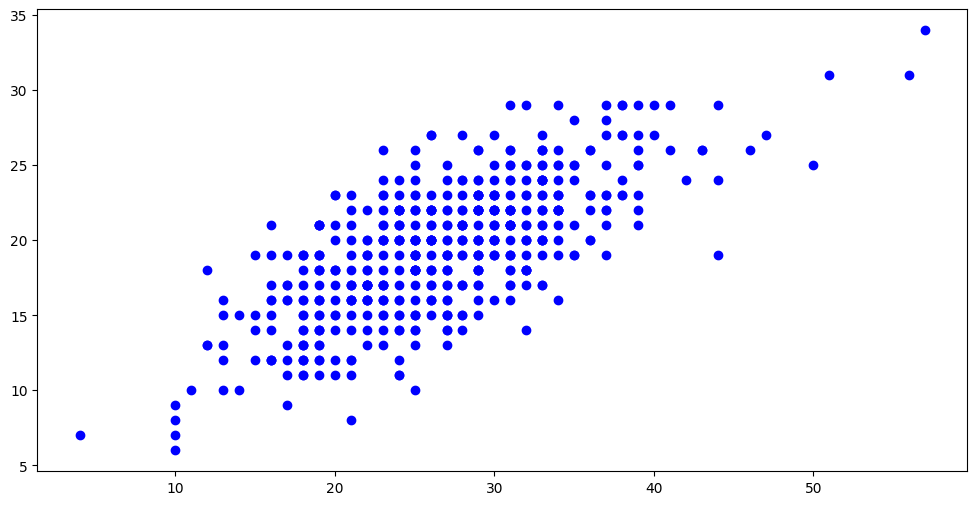

In [14]:
plt.figure(figsize=(12,6))
plt.plot(lebron_data['Pts'], lebron_data['FGA'], 'bo')

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

In [16]:
x = lebron_data[['FGA']]
y = lebron_data['Pts']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20)
model = LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
model.score(x_test,y_test)

0.4977584661183666

In [20]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f'The MAE is: {mae.round(3)}')
print(f'The MSLE is: {msle.round(3)}')

The MAE is: 4.33
The MSLE is: 0.045


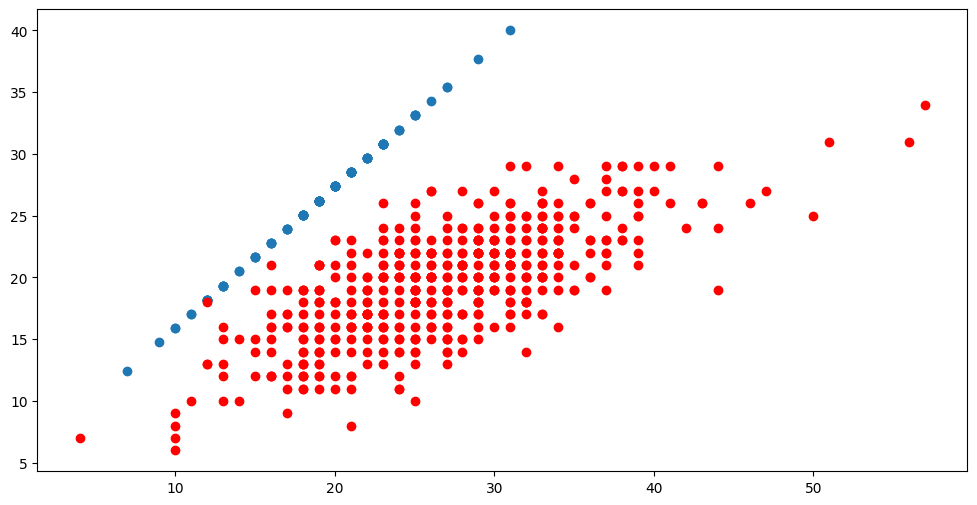

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(x_test,y_pred)
plt.plot(lebron_data['Pts'], lebron_data['FGA'], 'ro')

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logistic_model = LogisticRegression(max_iter=2000)

In [24]:
logistic_model.fit (x_train, y_train)

LogisticRegression(max_iter=2000)

In [25]:
logistic_pred = logistic_model.predict(x_test)
logistic_pred

array([33, 29, 29, 27, 18, 18, 33, 33, 27, 18, 29, 18, 33, 33, 27, 33, 27,
       18, 27, 33, 18, 18, 29, 33, 18, 29, 27, 33, 27, 27, 29, 27, 38, 29,
       19, 33, 18, 33, 29, 27, 19, 29, 27, 27, 29, 18, 18, 10, 29, 27, 29,
       18, 27, 33, 18, 29, 29, 29, 18, 29, 27, 29, 27, 27, 19, 29, 27, 33,
       19, 33, 18, 29, 18, 33, 33, 18, 27, 38, 29, 29, 27, 18, 33, 18, 33,
       27, 18, 33, 18, 27, 33, 33, 29, 27, 18, 29, 29, 29, 27],
      dtype=int64)

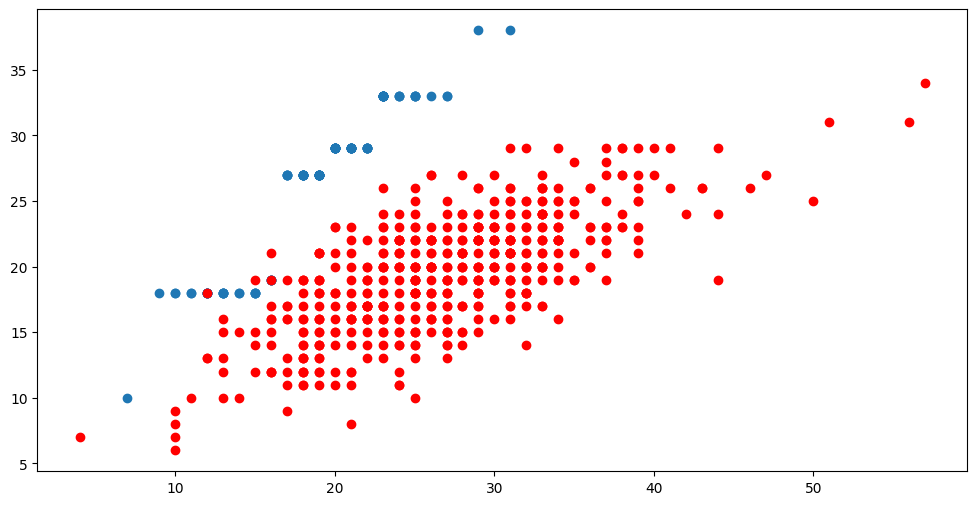

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(x_test,logistic_pred)
plt.plot(lebron_data['Pts'], lebron_data['FGA'], 'ro')

In [27]:
log_mae = mean_absolute_error(y_test, logistic_pred)
log_msle = mean_squared_log_error(y_test, logistic_pred)

print(f'The MAE is: {log_mae.round(3)}')
print(f'The MSLE is: {log_msle.round(3)}')

The MAE is: 4.667
The MSLE is: 0.053


In [30]:
from sklearn.metrics import classification_report

In [35]:
print (classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

          10       1.00      0.50      0.67         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.09      1.00      0.17         2
          19       0.25      0.17      0.20         6
          20       0.00      0.00      0.00         6
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         3
          23       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         4
          25       0.00      0.00      0.00        11
          26       0.00      0.00      0.00         9
          27       0.00      0.00      0.00         2
          28       0.00      0.00      0.00         4
          29       0.04    

c:\Users\kazir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kazir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kazir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [28]:
import seaborn as sns